# Assignment 7: Linear Model Selection and Regularization

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [7]:
import pandas as pd

train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


 Drop the Id columns from both train and test as these are not needed for prediction

In [8]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

Visualize a scatter plot of 'GrLivArea' in the x-axis and 'SalePrice' in the y-axis. Can you spot any outliers?

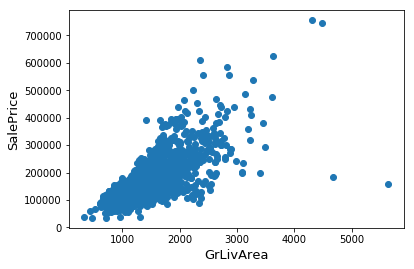

In [9]:
import matplotlib.pyplot as plt

plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Removing outliers in the data for all GrLivArea greater than 4000 then check the scatter plot again

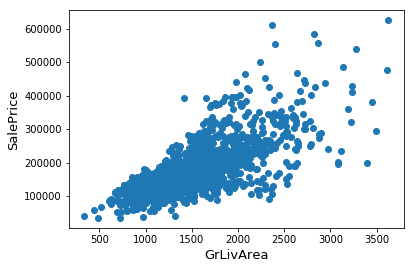

In [10]:
# Remove outliers for train['GrLivArea']>4000
train = train.drop(train[(train['GrLivArea']>4000)].index)

plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Convert categorical variable into dummy variables using pandas get_dummies API


In [ ]:
train = pd.get_dummies(train)

Impute missing data by the mean of each column.

In [18]:
train = train.fillna(train.mean())
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


Generate train test split 70/30

In [20]:
from sklearn.model_selection import train_test_split

X = train.drop(['SalePrice'], 1)
y = train.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Linear Regression

In [43]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression, ElasticNetCV

#Fit a linear regression model to this data
regr = LinearRegression()
regr.fit(X_train, y_train)

#Compute the RMSE 
y_pred = regr.predict(X_test)
meanSquaredError=mean_squared_error(y_test, y_pred)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

RMSE: 23657.36737341618


## Lasso Regression

Fit lasso regression to training data with alpha 20. (Bonus: You could try CV to find the best alpha within a range)

In [60]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha = 20)
lasso.fit(X_train, y_train)

#Compute the RMSE 
y_pred = lasso.predict(X_test)
meanSquaredError=mean_squared_error(y_test, y_pred)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

RMSE: 22786.875960887304


How many columns has the model chosen?

In [61]:
print(np.count_nonzero(lasso.coef_)) #It's the number of non null coefficient

186


## Ridge Regression

Perform ridge regression with alpha set to 0.1 and normalize to True. (Bonus: You could try CV to find the best alpha within a range). Comment on your observation.

In [72]:
ridge = linear_model.Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

What is your root mean squared error (RMSE)?

In [73]:
#Compute the RMSE 
y_pred = ridge.predict(X_test)
meanSquaredError=mean_squared_error(y_test, y_pred)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

RMSE: 22512.49559700079


In [74]:
print(np.count_nonzero(ridge.coef_)) 

283


## Elastic Net Regression

Perform elastic net regression with different values of alpha (0.01, 0.1 and 20). Compute the RMSE as well. 


In [83]:
model_ElasticNet=ElasticNet(alpha=0.01)
model_ElasticNet.fit(X_train,y_train)

y_pred = model_ElasticNet.predict(X_test)
meanSquaredError=mean_squared_error(y_test, y_pred)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

RMSE: 22317.4077415791


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
